In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Árvore de Decisão

In [2]:
titanic = pd.read_csv(r'bases\titanic.csv')

In [3]:
df = pd.get_dummies(titanic, columns=['Survived'], drop_first=True)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_Y
0,3,male,22.000000,1,0,7.2500,S,0
1,1,female,38.000000,1,0,71.2833,C,1
2,3,female,26.000000,0,0,7.9250,S,1
3,1,female,35.000000,1,0,53.1000,S,1
4,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,0
887,1,female,19.000000,0,0,30.0000,S,1
888,3,female,29.699118,1,2,23.4500,S,0
889,1,male,26.000000,0,0,30.0000,C,1


## Análise Descritiva

## Sobreviência por Sexo

In [4]:
taxa_mort = df[['Sex', 'Survived_Y', 'Embarked']].groupby(['Sex'], as_index=False).aggregate({'Survived_Y':'mean', 'Embarked':'count'})
taxa_mort

,Sex,Survived_Y,Embarked
0,female,0.742038,314
1,male,0.188908,577


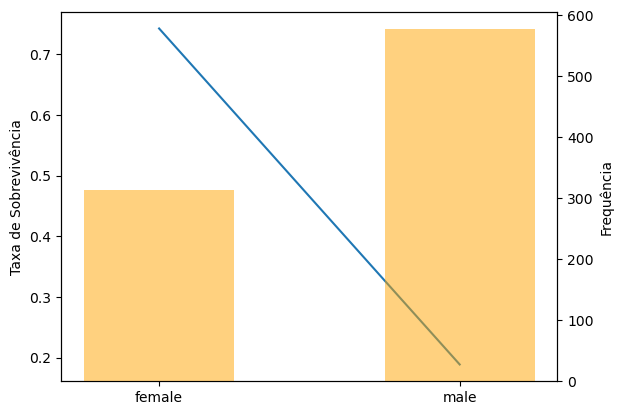

In [5]:
# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(taxa_mort.Sex, taxa_mort.Survived_Y) 
ax1.set_ylabel('Taxa de Sobrevivência')
#ax1.set_ylim(0, 25)
#ax1.legend(['Taxa Mortalidade'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(taxa_mort.Sex, taxa_mort.Embarked, width=0.5, alpha=0.5, color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Frequência')
#ax2.set_ylim(0, 90)
#ax2.legend(['Frequência'], loc="upper right")
plt.show()

## Sobreviência por Classe

In [6]:
taxa_mort = df[['Pclass', 'Survived_Y', 'Embarked']].groupby(['Pclass'], as_index=False).aggregate({'Survived_Y':'mean', 'Embarked':'count'})
taxa_mort

,Pclass,Survived_Y,Embarked
0,1,0.629630,216
1,2,0.472826,184
2,3,0.242363,491


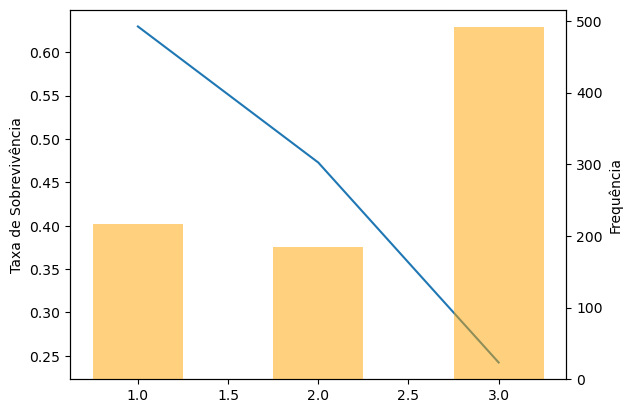

In [7]:
# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(taxa_mort.Pclass, taxa_mort.Survived_Y) 
ax1.set_ylabel('Taxa de Sobrevivência')
#ax1.set_ylim(0, 25)
#ax1.legend(['Taxa Sobrevivência'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(taxa_mort.Pclass, taxa_mort.Embarked, width=0.5, alpha=0.5, color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Frequência')
#ax2.set_ylim(0, 90)
#ax2.legend(['Frequência'], loc="upper right")
plt.show()

## Sobreviência por Embarque

In [8]:
freq_embarque = pd.DataFrame(df['Embarked'].value_counts())
freq_embarque = freq_embarque.sort_index()

In [9]:
taxa_mort = df[['Embarked', 'Survived_Y', 'Pclass']].groupby(['Embarked'], as_index=False).aggregate({'Survived_Y':'mean', 'Pclass':'count'})
taxa_mort

,Embarked,Survived_Y,Pclass
0,C,0.553571,168
1,Q,0.389610,77
2,S,0.339009,646


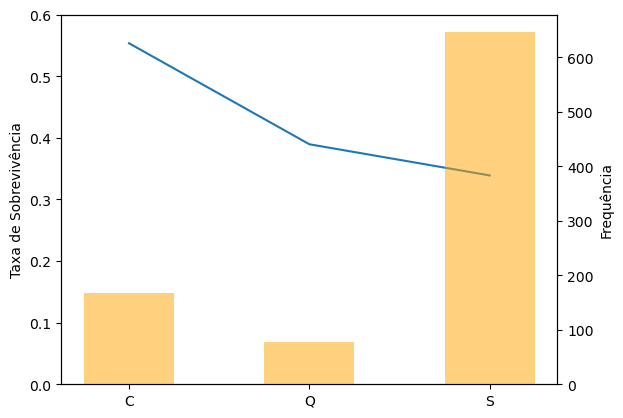

In [10]:
# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(taxa_mort.Embarked, taxa_mort.Survived_Y) 
ax1.set_ylabel('Taxa de Sobrevivência')
ax1.set_ylim(0, 0.60)
#ax1.legend(['Taxa Sobrevivência'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(taxa_mort.Embarked, taxa_mort.Pclass, width=0.5, alpha=0.5, color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Frequência')
#ax2.set_ylim(0, 90)
#ax2.legend(['Frequência'], loc="upper right")
plt.show()

## Sobreviência por Acompanhado

In [11]:
taxa_mort = df[['SibSp', 'Survived_Y', 'Embarked']].groupby(['SibSp'], as_index=False).aggregate({'Survived_Y':'mean', 'Embarked':'count'})
taxa_mort

,SibSp,Survived_Y,Embarked
0,0,0.345395,608
1,1,0.535885,209
2,2,0.464286,28
3,3,0.250000,16
4,4,0.166667,18
5,5,0.000000,5
6,8,0.000000,7


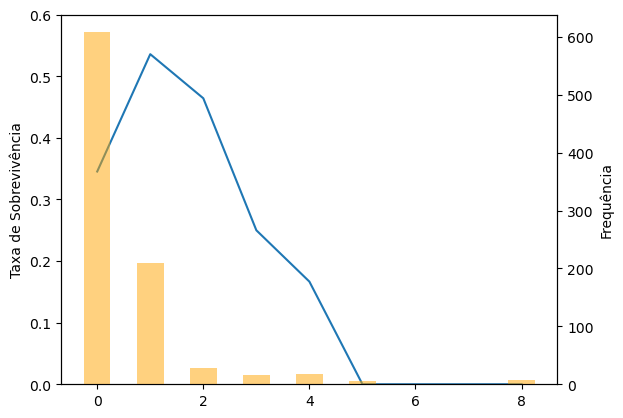

In [12]:
# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(taxa_mort.SibSp, taxa_mort.Survived_Y) 
ax1.set_ylabel('Taxa de Sobrevivência')
ax1.set_ylim(0, 0.60)
#ax1.legend(['Taxa Sobrevivência'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(taxa_mort.SibSp, taxa_mort.Embarked, width=0.5, alpha=0.5, color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Frequência')
#ax2.set_ylim(0, 90)
#ax2.legend(['Frequência'], loc="upper right")
plt.show()

## Sobreviência por Parentes

In [13]:
taxa_mort = df[['Parch', 'Survived_Y', 'Embarked']].groupby(['Parch'], as_index=False).aggregate({'Survived_Y':'mean', 'Embarked':'count'})
taxa_mort

,Parch,Survived_Y,Embarked
0,0,0.343658,678
1,1,0.550847,118
2,2,0.500000,80
3,3,0.600000,5
4,4,0.000000,4
5,5,0.200000,5
6,6,0.000000,1


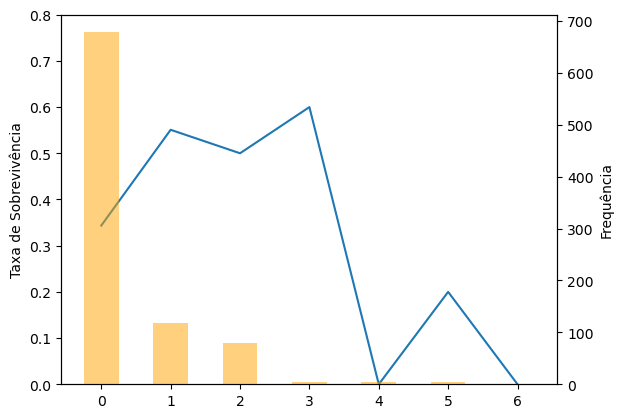

In [14]:
# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(taxa_mort.Parch, taxa_mort.Survived_Y) 
ax1.set_ylabel('Taxa de Sobrevivência')
ax1.set_ylim(0, 0.80)
#ax1.legend(['Taxa Sobrevivência'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(taxa_mort.Parch, taxa_mort.Embarked, width=0.5, alpha=0.5, color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Frequência')
#ax2.set_ylim(0, 90)
#ax2.legend(['Frequência'], loc="upper right")
plt.show()

## Sobreviência por Idade

In [15]:
df['fx_idade'] = pd.qcut(df['Age'], q=15, duplicates='drop').astype('str')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_Y,fx_idade
0,3,male,22.000000,1,0,7.2500,S,0,"(20.0, 23.0]"
1,1,female,38.000000,1,0,71.2833,C,1,"(34.0, 38.0]"
2,3,female,26.000000,0,0,7.9250,S,1,"(25.0, 28.0]"
3,1,female,35.000000,1,0,53.1000,S,1,"(34.0, 38.0]"
4,3,male,35.000000,0,0,8.0500,S,0,"(34.0, 38.0]"
...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,0,"(25.0, 28.0]"
887,1,female,19.000000,0,0,30.0000,S,1,"(18.0, 20.0]"
888,3,female,29.699118,1,2,23.4500,S,0,"(28.0, 29.699]"
889,1,male,26.000000,0,0,30.0000,C,1,"(25.0, 28.0]"


In [16]:
taxa_mort = df[['fx_idade', 'Survived_Y', 'Embarked']].groupby(['fx_idade'], as_index=False).aggregate({'Survived_Y':'mean', 'Embarked':'count'})

C:\Users\leosm\AppData\Local\Temp\ipykernel_18300\4009617738.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(taxa_mort.fx_idade, rotation=45)


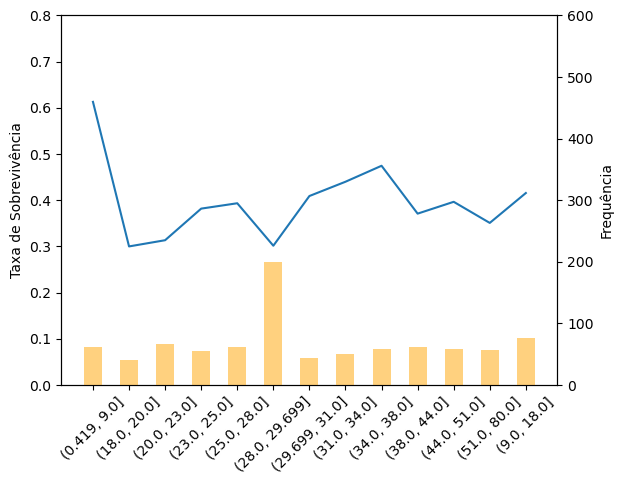

In [17]:
# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(taxa_mort.fx_idade, taxa_mort.Survived_Y) 
ax1.set_ylabel('Taxa de Sobrevivência')
ax1.set_ylim(0, 0.80)
ax1.set_xticklabels(taxa_mort.fx_idade, rotation=45)
#ax1.legend(['Taxa Sobrevivência'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(taxa_mort.fx_idade, taxa_mort.Embarked, width=0.5, alpha=0.5, color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Frequência')
ax2.set_ylim(0, 600)
#ax2.set_xticklabels(taxa_mort.fx_idade, rotation=90)
#ax2.legend(['Frequência'], loc="upper right")
plt.show()

## Sobreviência por Preço Ticket

In [18]:
df['fx_ticket'] = pd.qcut(df['Fare'], q=10, duplicates='drop').astype('str')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_Y,fx_idade,fx_ticket
0,3,male,22.000000,1,0,7.2500,S,0,"(20.0, 23.0]","(-0.001, 7.55]"
1,1,female,38.000000,1,0,71.2833,C,1,"(34.0, 38.0]","(39.688, 77.958]"
2,3,female,26.000000,0,0,7.9250,S,1,"(25.0, 28.0]","(7.854, 8.05]"
3,1,female,35.000000,1,0,53.1000,S,1,"(34.0, 38.0]","(39.688, 77.958]"
4,3,male,35.000000,0,0,8.0500,S,0,"(34.0, 38.0]","(7.854, 8.05]"
...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,0,"(25.0, 28.0]","(10.5, 14.454]"
887,1,female,19.000000,0,0,30.0000,S,1,"(18.0, 20.0]","(27.0, 39.688]"
888,3,female,29.699118,1,2,23.4500,S,0,"(28.0, 29.699]","(21.679, 27.0]"
889,1,male,26.000000,0,0,30.0000,C,1,"(25.0, 28.0]","(27.0, 39.688]"


In [19]:
taxa_mort = df[['fx_ticket', 'Survived_Y', 'Embarked']].groupby(['fx_ticket'], as_index=False).aggregate({'Survived_Y':'mean', 'Embarked':'count'})

C:\Users\leosm\AppData\Local\Temp\ipykernel_18300\2119101588.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(taxa_mort.fx_ticket, rotation=45)


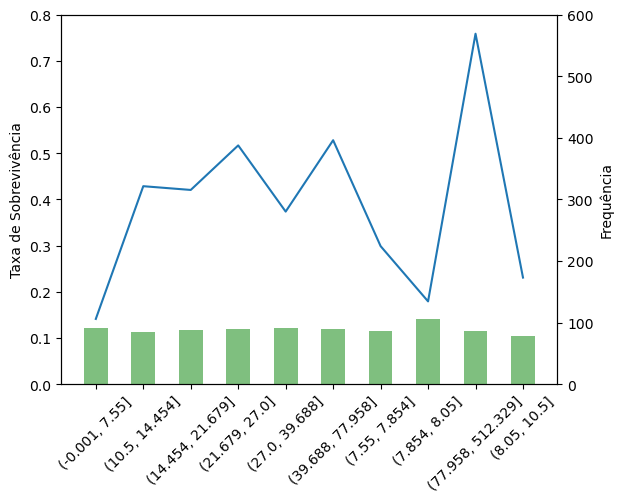

In [20]:
# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(taxa_mort.fx_ticket, taxa_mort.Survived_Y) 
ax1.set_ylabel('Taxa de Sobrevivência')
ax1.set_ylim(0, 0.80)
ax1.set_xticklabels(taxa_mort.fx_ticket, rotation=45)
#ax1.legend(['Taxa Sobrevivência'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(taxa_mort.fx_ticket, taxa_mort.Embarked, width=0.5, alpha=0.5, color='green')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Frequência')
ax2.set_ylim(0, 600)
#ax2.set_xticklabels(taxa_mort.fx_idade, rotation=90)
#ax2.legend(['Frequência'], loc="upper right")
plt.show()

## Construir Árvore de Decisão

Documentação: https://scikit-learn.org/stable/modules/tree.html

Qual variável nos dá mais informação para separar quem teve mais chance de sobreviver?<br>
No case o Sexo é uma variável que tem bastante diferença entre as probabilidades de sobrevivência

A regra que será usada para trazer qual variável é mais importante para compor um nó, será o índice de GINI ou Entropia (decidir o que agrega mais informação e pureza do grupo - minimizar a impureza do grupo).

> Maior o valor de Gini, maior a homogenidade;

### Hiperparâmetros:

- Número mínimo de observações por folha (min_samples_split);
- Produnfidade máxima (max_depth);
- CP: custo de complexidade;


In [21]:
from sklearn.tree import DecisionTreeClassifier # to build a classification tree

In [22]:
# Transforma as variáveis Categóricas em Categóricas Numéricas
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)

varivaveis = df[['Sex', 'Embarked']]

# Encoding the variable
data = varivaveis.apply(lambda x: d[x.name].fit_transform(x))

In [23]:
data['Pclass'] = df['Pclass']
data['Age'] = df['Age']
data['SibSp'] = df['SibSp']
data['Parch'] = df['Parch']
data['Fare'] = df['Fare']
data

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,1,2,3,22.000000,1,0,7.2500
1,0,0,1,38.000000,1,0,71.2833
2,0,2,3,26.000000,0,0,7.9250
3,0,2,1,35.000000,1,0,53.1000
4,1,2,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,1,2,2,27.000000,0,0,13.0000
887,0,2,1,19.000000,0,0,30.0000
888,0,2,3,29.699118,1,2,23.4500
889,1,0,1,26.000000,0,0,30.0000


In [24]:
x_train = data
y_train = df['Survived_Y']

In [25]:
# Aplicando o Modelo
model = DecisionTreeClassifier(criterion='gini', max_depth = 3)
dt = model.fit(x_train, y_train)

In [26]:
y_pred = dt.predict(x_train)

### Acurácia

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.8271604938271605

### Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
matriz = pd.DataFrame(confusion_matrix(y_train, y_pred).T, 
                      columns=['Real Não', 'Real Sim'], index=['Modelo Não', 'Modelo Sim'])
matriz

,Real Não,Real Sim
Modelo Não,493,98
Modelo Sim,56,244


### Indicadores

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

sensitividade = recall_score(y_train, y_pred, pos_label=1)
especificidadee = recall_score(y_train, y_pred, pos_label=0)
acuracia = accuracy_score(y_train, y_pred)

#Visualizando os principais indicadores desta matriz de confusão
pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidadee],
                                'Acurácia':[acuracia]})

,Sensitividade,Especificidade,Acurácia
0,0.71345,0.897996,0.82716


## Plotando a Árvore

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

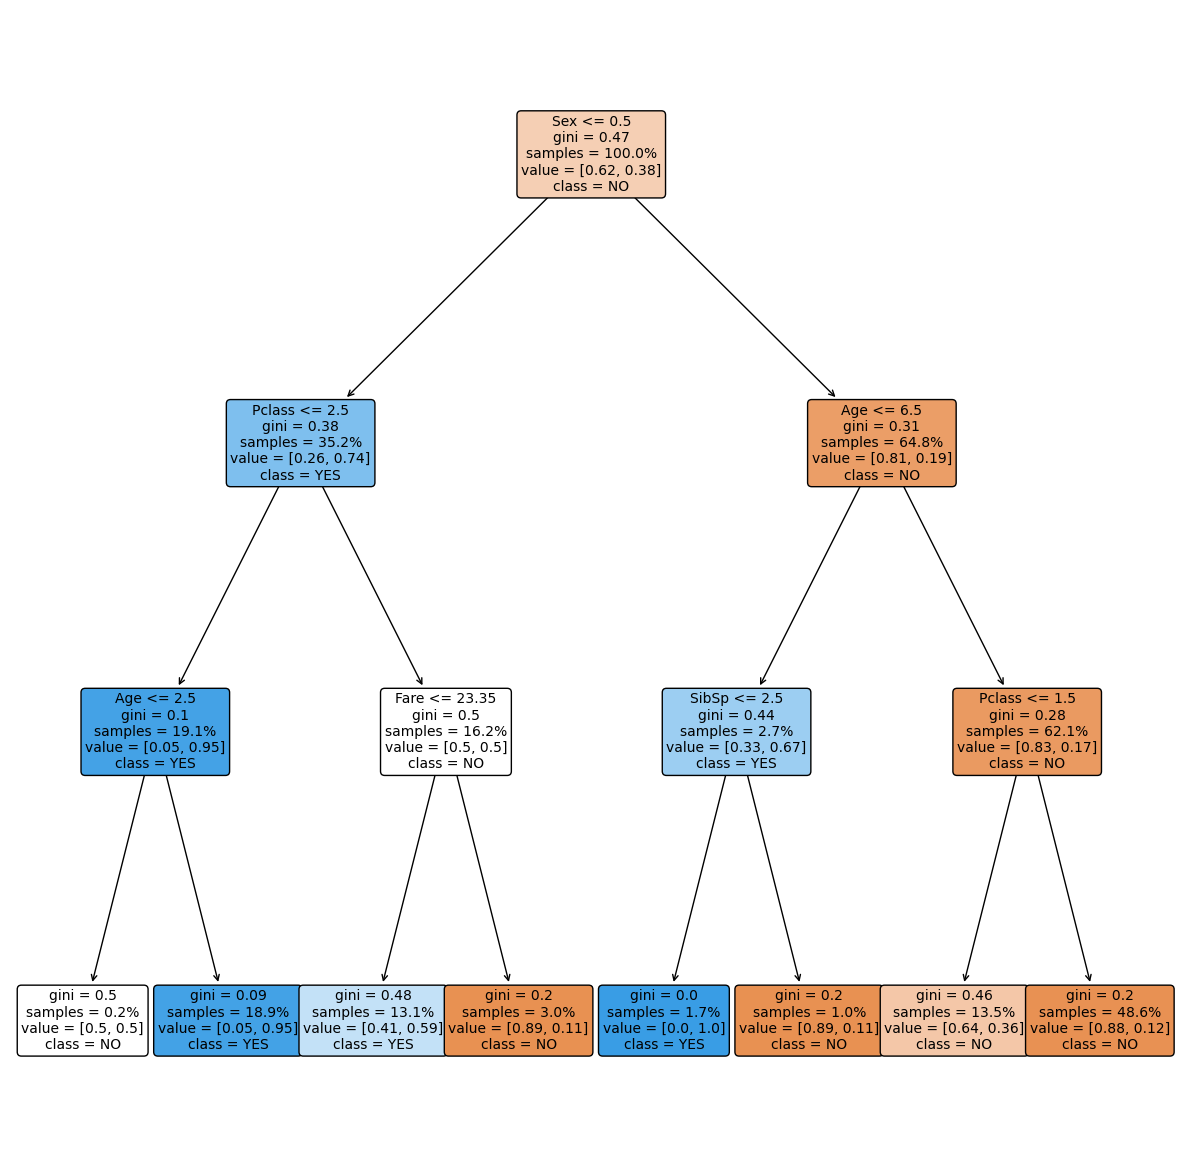

In [30]:
from sklearn.tree import plot_tree # to draw a classification tree
## NOTE: We can plot the tree and it is huge!
plt.figure(figsize=(15, 15))
plot_tree(dt, 
          filled=True, 
          rounded=True, 
          proportion=True, 
          precision=2, 
          fontsize= 10, 
          class_names=["NO", "YES"], 
          feature_names=x_train.columns); 

## Curva ROC ( Receiver Operating Characterist)

Maior a área debaixo da curva ROC melhor.

Para aumentar a área é necessário incluir novas variáveis com betas estatisticamente significantes após stepwise

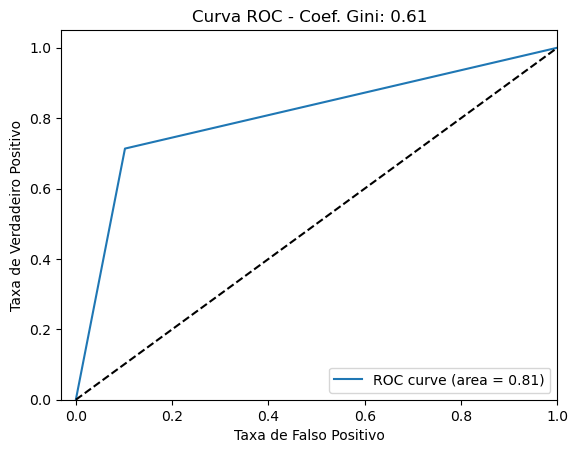

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()

# Utilizando Conceito de Bases Treino e Teste (Cross Validation)

In [82]:
from sklearn.model_selection import train_test_split # to split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    df['Survived_Y'], 
                                                    #random_state=42, 
                                                    test_size=25)

In [83]:
# Aplicando o Modelo
model = DecisionTreeClassifier(criterion='gini', 
                               ccp_alpha =0, 
                               min_samples_leaf=1, 
                               max_depth = 30)
dt_cross = model.fit(X_train, y_train)

## Avaliar a Árvore na Base de Treino

In [84]:
# Predict na Base de Treino
y_pred_train_cross = dt_cross.predict(X_train)

# Predict na Base de Teste
y_pred_test_cross = dt_cross.predict(X_test)

## Acurácia

### Base De Treino

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train_cross)

0.9826789838337182

### Base De Teste

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test_cross)

0.8

# Curva ROC

Analisando os indicadores, verifica-se um overfitting bastante alto. 

A base de treino apresenta uma acurácia, área ROC e coef. Gini bastante elevados enquanto que ao prever a base treino, esses indicadores caem bastante.


## Base Treino

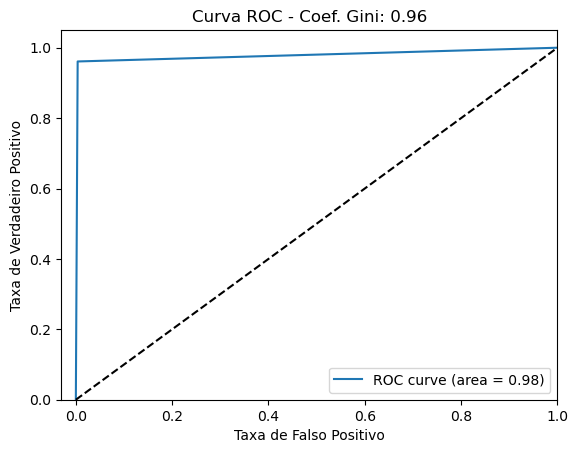

In [87]:
# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train_cross)
roc_auc = roc_auc_score(y_train, y_pred_train_cross)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()

## Base Teste

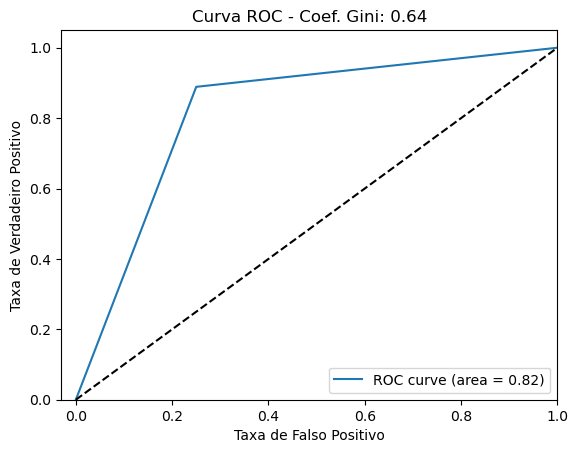

In [88]:
# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_cross)
roc_auc = roc_auc_score(y_test, y_pred_test_cross)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()

# Reduzindo o Overfitting

In [89]:
# Aplicando o Modelo
model = DecisionTreeClassifier(criterion='gini', 
                               ccp_alpha =0,     # alteração no CP
                               min_samples_leaf=1, 
                               max_depth = 30)
dt_cross = model.fit(X_train, y_train)

In [90]:
# Predict na Base de Treino
y_pred_train_cross = dt_cross.predict(X_train)

# Predict na Base de Teste
y_pred_test_cross = dt_cross.predict(X_test)

### Acurácia

In [91]:
print(f'Acurácia Treino: {accuracy_score(y_train, y_pred_train_cross)}')
print(f'Acurácia Teste: {accuracy_score(y_test, y_pred_test_cross)}')

Acurácia Treino: 0.9826789838337182
Acurácia Teste: 0.84


## Curva ROC

### Base Treino

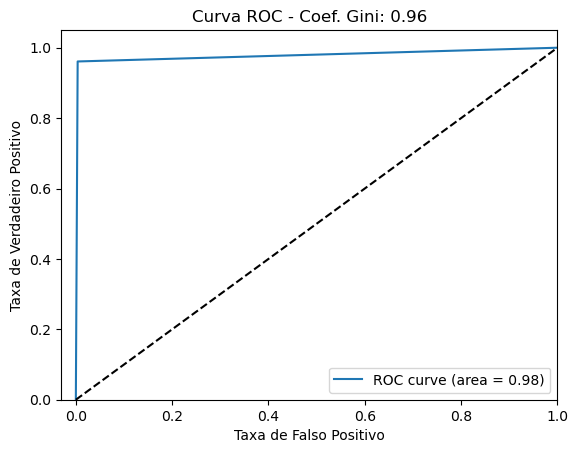

In [92]:
# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train_cross)
roc_auc = roc_auc_score(y_train, y_pred_train_cross)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()

### Base Teste

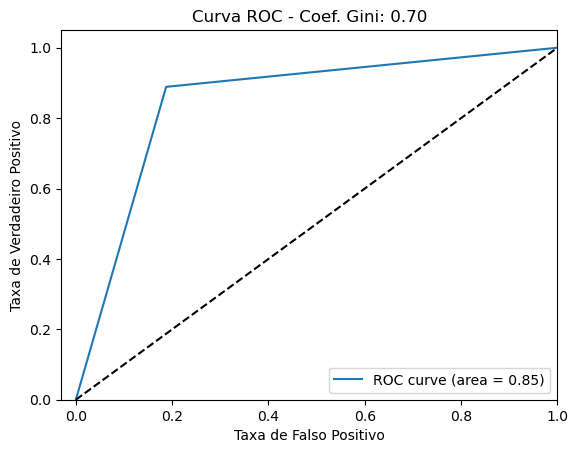

In [93]:
# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_cross)
roc_auc = roc_auc_score(y_test, y_pred_test_cross)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()

# Encontrando o Melhor Custo de Complexidade 

Documentação: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [94]:
path = dt_cross.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decision trees into

## now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

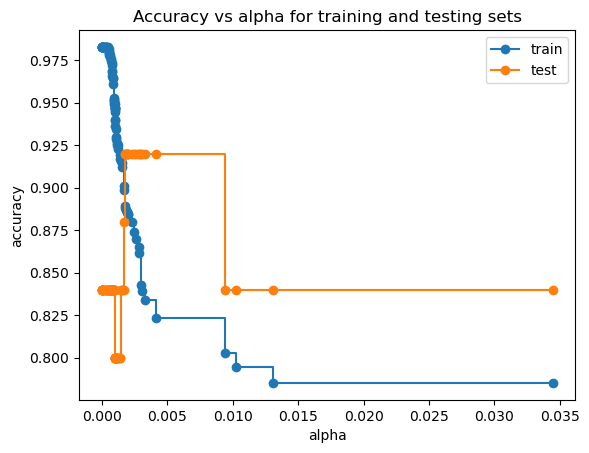

In [95]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [96]:
ccp = pd.DataFrame()
ccp['ccp_alpha'] = ccp_alphas
ccp['test_score'] = test_scores
ccp

,ccp_alpha,test_score
0,0.000000,0.84
1,0.000021,0.84
2,0.000032,0.84
3,0.000041,0.84
4,0.000055,0.84
...,...,...
77,0.004181,0.92
78,0.009435,0.84
79,0.010264,0.84
80,0.013074,0.84


In [97]:
ccp[ccp['test_score']== ccp['test_score'].max()]

,ccp_alpha,test_score
62,0.001745,0.92
63,0.001782,0.92
64,0.001845,0.92
65,0.001925,0.92
66,0.001925,0.92
67,0.001980,0.92
68,0.002008,0.92
69,0.002343,0.92
70,0.002478,0.92
71,0.002596,0.92


### Simulando Validação Cruzada (5 k-folds)

Em validação cruzada k-fold, os dados são divididos em k partes (ou "dobras") de tamanhos aproximadamente iguais. O modelo é treinado k vezes, cada vez utilizando k-1 partes dos dados como conjunto de treinamento e a parte restante como conjunto de teste. O desempenho do modelo é então avaliado pela média dos resultados obtidos em cada iteração.

Essa técnica é utilizada para estimar a capacidade de generalização do modelo, permitindo uma avaliação mais robusta do seu desempenho, especialmente quando o tamanho do conjunto de dados é limitado.

Em resumo, a validação cruzada k-fold é uma abordagem que divide os dados em k partes, treina e avalia o modelo em múltiplas iterações, e fornece uma medida mais confiável do seu desempenho.

<AxesSubplot:xlabel='alpha'>

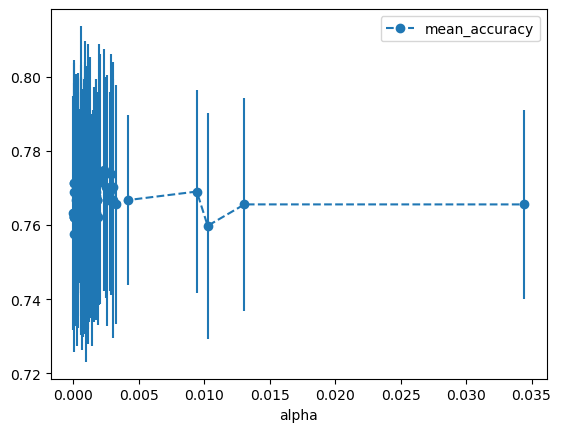

In [98]:
from sklearn.model_selection import cross_val_score # for cross validation
## create an array to store the results of each fold during cross validiation
alpha_loop_values = []

## For each candidate value for alpha, we will run 5-fold cross validation.
## Then we will store the mean and standard deviation of the scores (the accuracy) for each call
## to cross_val_score in alpha_loop_values...
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_cross, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

## Now we can draw a graph of the means and standard deviations of the scores
## for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--')

In [99]:
results = alpha_results[(alpha_results['alpha'] > 0.001)
              &
              (alpha_results['alpha'] < 0.02)]

results[results['mean_accuracy'] == results['mean_accuracy'].max()]

,alpha,mean_accuracy,std
69,0.002343,0.774792,0.032697


In [100]:
alpha_results[alpha_results['mean_accuracy'] == alpha_results['mean_accuracy'].max()]

,alpha,mean_accuracy,std
17,0.000573,0.778247,0.035405


In [106]:
alpha_results[alpha_results['std'] == alpha_results['std'].min()]

,alpha,mean_accuracy,std
59,0.001584,0.762115,0.020582


# Modelo Com Poda

Utiliza o CCP que traz a maior acurácia possível

In [101]:
# Aplicando o Modelo
model = DecisionTreeClassifier(criterion='gini', 
                               ccp_alpha = 0.002343,     # alteração no CP
                               min_samples_leaf=1, 
                               max_depth = 30)
dt_poda = model.fit(X_train, y_train)

In [102]:
# Predict na Base de Treino
y_pred_train_poda = dt_poda.predict(X_train)

# Predict na Base de Teste
y_pred_test_poda = dt_poda.predict(X_test)

## Acurácia

In [103]:
print(f'Acurácia Treino: {accuracy_score(y_train, y_pred_train_poda)}')
print(f'Acurácia Teste: {accuracy_score(y_test, y_pred_test_poda)}')

Acurácia Treino: 0.8799076212471132
Acurácia Teste: 0.92


## Curva ROC Poda

### Base Treino

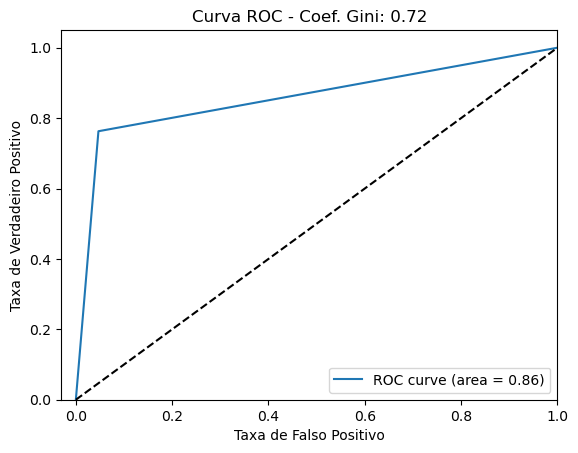

In [104]:
# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train_poda)
roc_auc = roc_auc_score(y_train, y_pred_train_poda)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()

### Base Teste Poda

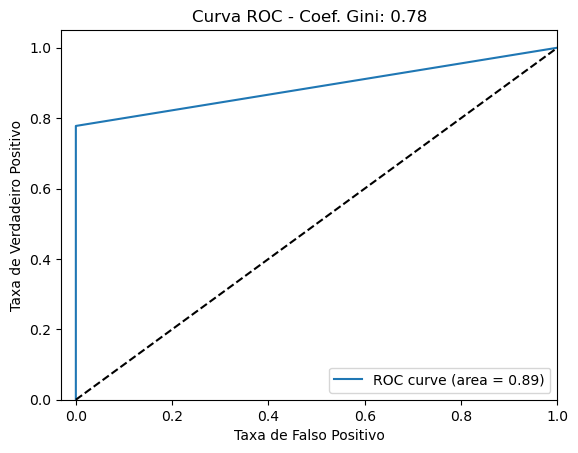

In [105]:
# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_poda)
roc_auc = roc_auc_score(y_test, y_pred_test_poda)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()